In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
df = pd.read_csv("data/banking_dataset.csv", sep=";")

In [193]:
df.head()

Account ID        Customer Name       Account Type        Branch  \
0   ACC00001          Amanda Pugh  Recurring Deposit      New York   
1   ACC00002        Amanda Wilcox  Recurring Deposit       Houston   
2   ACC00003  Kimberly Valenzuela            Current      New York   
3   ACC00004        Sonia Ballard  Recurring Deposit  Philadelphia   
4   ACC00005        Erika Russell            Current  Philadelphia   

  Transaction Type Transaction Amount Account Balance Currency  
0            Debit            2687,19        36676,19      GBP  
1            Debit            3886,77        28582,82      USD  
2           Credit            2438,74        76599,56      GBP  
3           Credit            2758,53         62317,6      INR  
4            Debit               3287        85515,21      INR

In [194]:
df['Transaction Amount'] = df['Transaction Amount'].str.replace(',', '.').astype(float)
df['Account Balance'] = df['Account Balance'].str.replace(',', '.').astype(float)

In [195]:
df = df.drop(['Account ID', 'Customer Name'], axis = 1)

In [196]:
df.head()

Account Type        Branch Transaction Type  Transaction Amount  \
0  Recurring Deposit      New York            Debit             2687.19   
1  Recurring Deposit       Houston            Debit             3886.77   
2            Current      New York           Credit             2438.74   
3  Recurring Deposit  Philadelphia           Credit             2758.53   
4            Current  Philadelphia            Debit             3287.00   

   Account Balance Currency  
0         36676.19      GBP  
1         28582.82      USD  
2         76599.56      GBP  
3         62317.60      INR  
4         85515.21      INR

In [197]:
df = pd.get_dummies(df, columns=['Branch', 'Transaction Type', 'Currency', 'Account Type'])

In [198]:
df.head()

Transaction Amount  Account Balance  Branch_Chicago  Branch_Houston  \
0             2687.19         36676.19           False           False   
1             3886.77         28582.82           False            True   
2             2438.74         76599.56           False           False   
3             2758.53         62317.60           False           False   
4             3287.00         85515.21           False           False   

   Branch_Los Angeles  Branch_New York  Branch_Philadelphia  Branch_Phoenix  \
0               False             True                False           False   
1               False            False                False           False   
2               False             True                False           False   
3               False            False                 True           False   
4               False            False                 True           False   

   Branch_San Antonio  Branch_San Diego  ...  Transaction Type_Debit  \
0               False             False  ...                    True   
1               False             False  ...                    True   
2               False             False  ...                   False   
3               False             False  ...                   False   
4               False             False  ...                    True   

   Currency_EUR  Currency_GBP  Currency_INR  Currency_JPY  Currency_USD  \
0         False          True         False         False         False   
1         False         False         False         False          True   
2         False          True         False         False         False   
3         False         False          True         False         False   
4         False         False          True         False         False   

   Account Type_Current  Account Type_Fixed Deposit  \
0                 False                       False   
1                 False                       False   
2                  True                       False   
3                 False                       False   
4                  True                       False   

   Account Type_Recurring Deposit  Account Type_Savings  
0                            True                 False  
1                            True                 False  
2                           False                 False  
3                            True                 False  
4                           False                 False  

[5 rows x 21 columns]

In [199]:
df.shape

(10000, 21)

In [69]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df1 = df.copy()

X = df1.values

# t-SNE dla nieprzekształconych danych
tsne_raw = TSNE(n_components=2, random_state=42)
X_tsne_raw = tsne_raw.fit_transform(X)

# 2. t-SNE dla danych po normalizacji
X_minmax = MinMaxScaler().fit_transform(X)
X_tsne_minmax = TSNE(n_components=2, random_state=42).fit_transform(X_minmax)

# 3. t-SNE dla danych po standaryzacji
X_standard = StandardScaler().fit_transform(X)
X_tsne_standard = TSNE(n_components=2, random_state=42).fit_transform(X_standard)

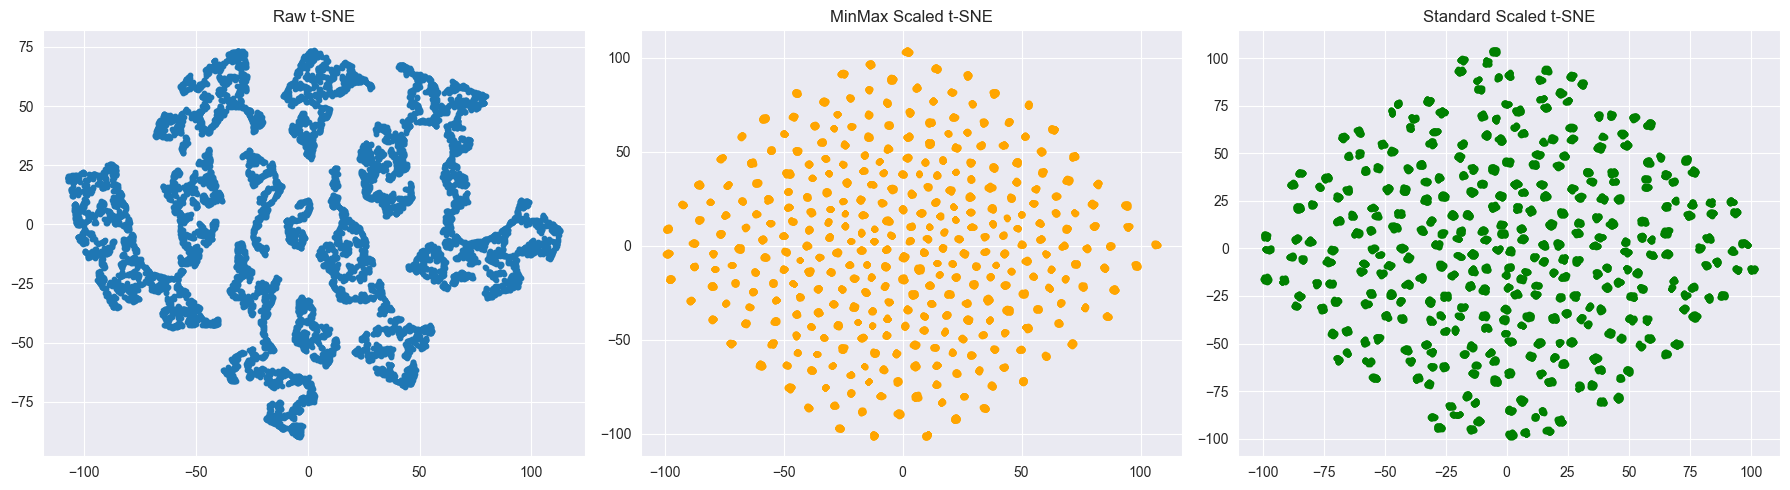

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_tsne_raw[:, 0], X_tsne_raw[:, 1], s=10)
axes[0].set_title('Raw t-SNE')

axes[1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10, c='orange')
axes[1].set_title('MinMax Scaled t-SNE')

axes[2].scatter(X_tsne_standard[:, 0], X_tsne_standard[:, 1], s=10, c='green')
axes[2].set_title('Standard Scaled t-SNE')

plt.tight_layout()
plt.show()

In [175]:
df_original = pd.read_csv("data/banking_dataset.csv", sep=";")

In [176]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_original['Transaction Type'] = le.fit_transform(df_original['Transaction Type'])
df_original['Account Type'] = le.fit_transform(df_original['Account Type'])
df_original['Branch'] = le.fit_transform(df_original['Branch'])
df_original['Currency'] = le.fit_transform(df_original['Currency'])

df_original['Transaction Amount'] = df_original['Transaction Amount'].str.replace(',', '.').astype(float)
df_original['Account Balance'] = df_original['Account Balance'].str.replace(',', '.').astype(float)

df_original = df_original.drop(['Account ID', 'Customer Name'], axis = 1)

Text(0.5, 1.0, 'Transaction Amount vs Account Balance (Currency)')

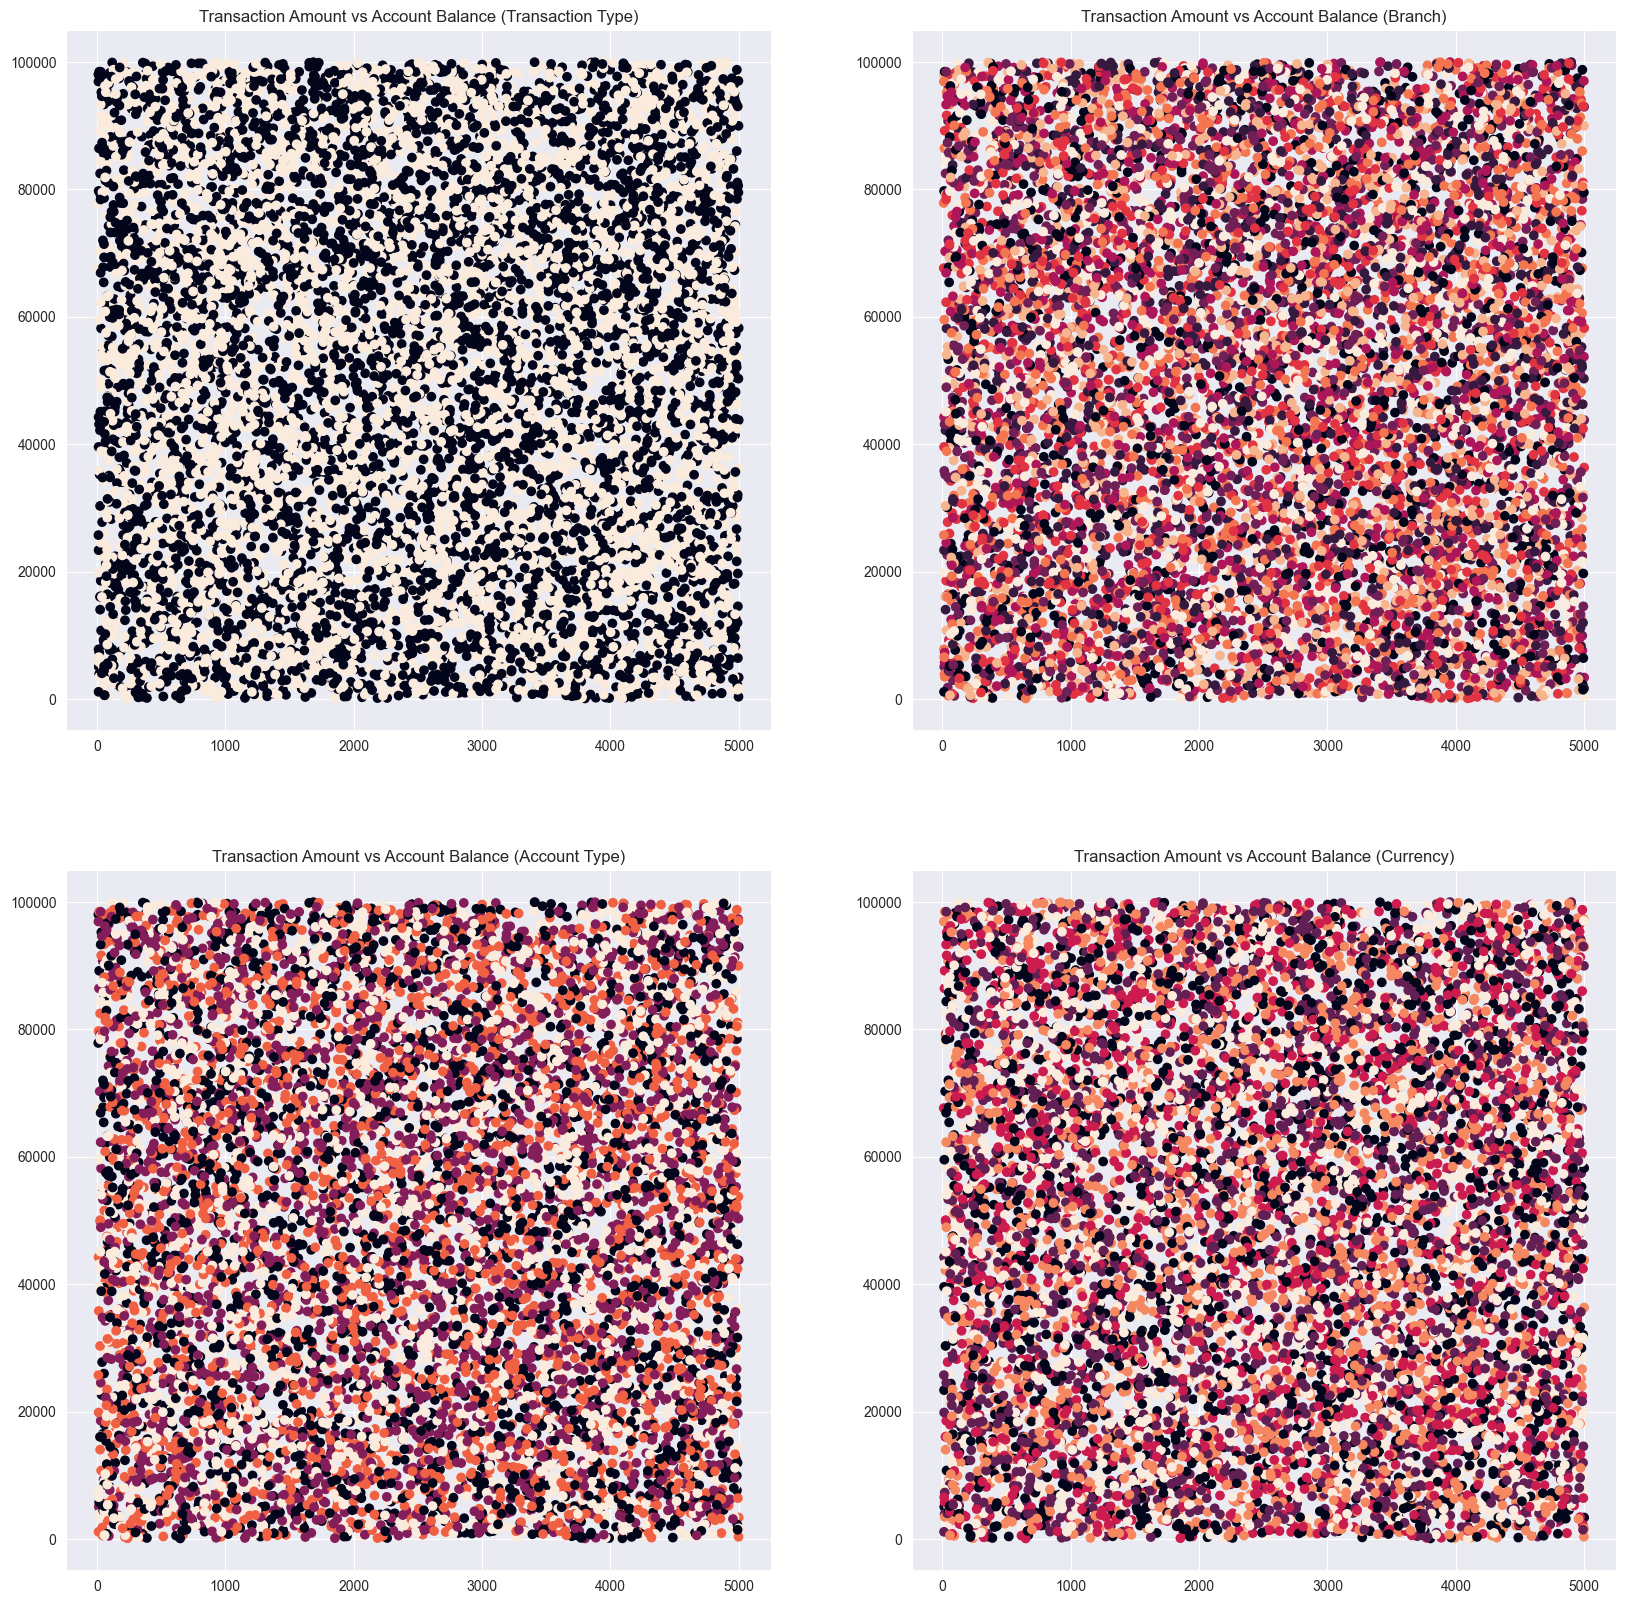

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0,0].scatter(df['Transaction Amount'], df['Account Balance'], c=df_original['Transaction Type'])
axes[0,0].set_title('Transaction Amount vs Account Balance (Transaction Type)')

axes[1,0].scatter(df['Transaction Amount'], df['Account Balance'], c=df_original['Account Type'])
axes[1,0].set_title('Transaction Amount vs Account Balance (Account Type)')

axes[0,1].scatter(df['Transaction Amount'], df['Account Balance'], c=df_original['Branch'])
axes[0,1].set_title('Transaction Amount vs Account Balance (Branch)')

axes[1,1].scatter(df['Transaction Amount'], df['Account Balance'], c=df_original['Currency'])
axes[1,1].set_title('Transaction Amount vs Account Balance (Currency)')

Nie ma tu niczego

Text(0.5, 1.0, 'Scatter t-SNE (Currency)')

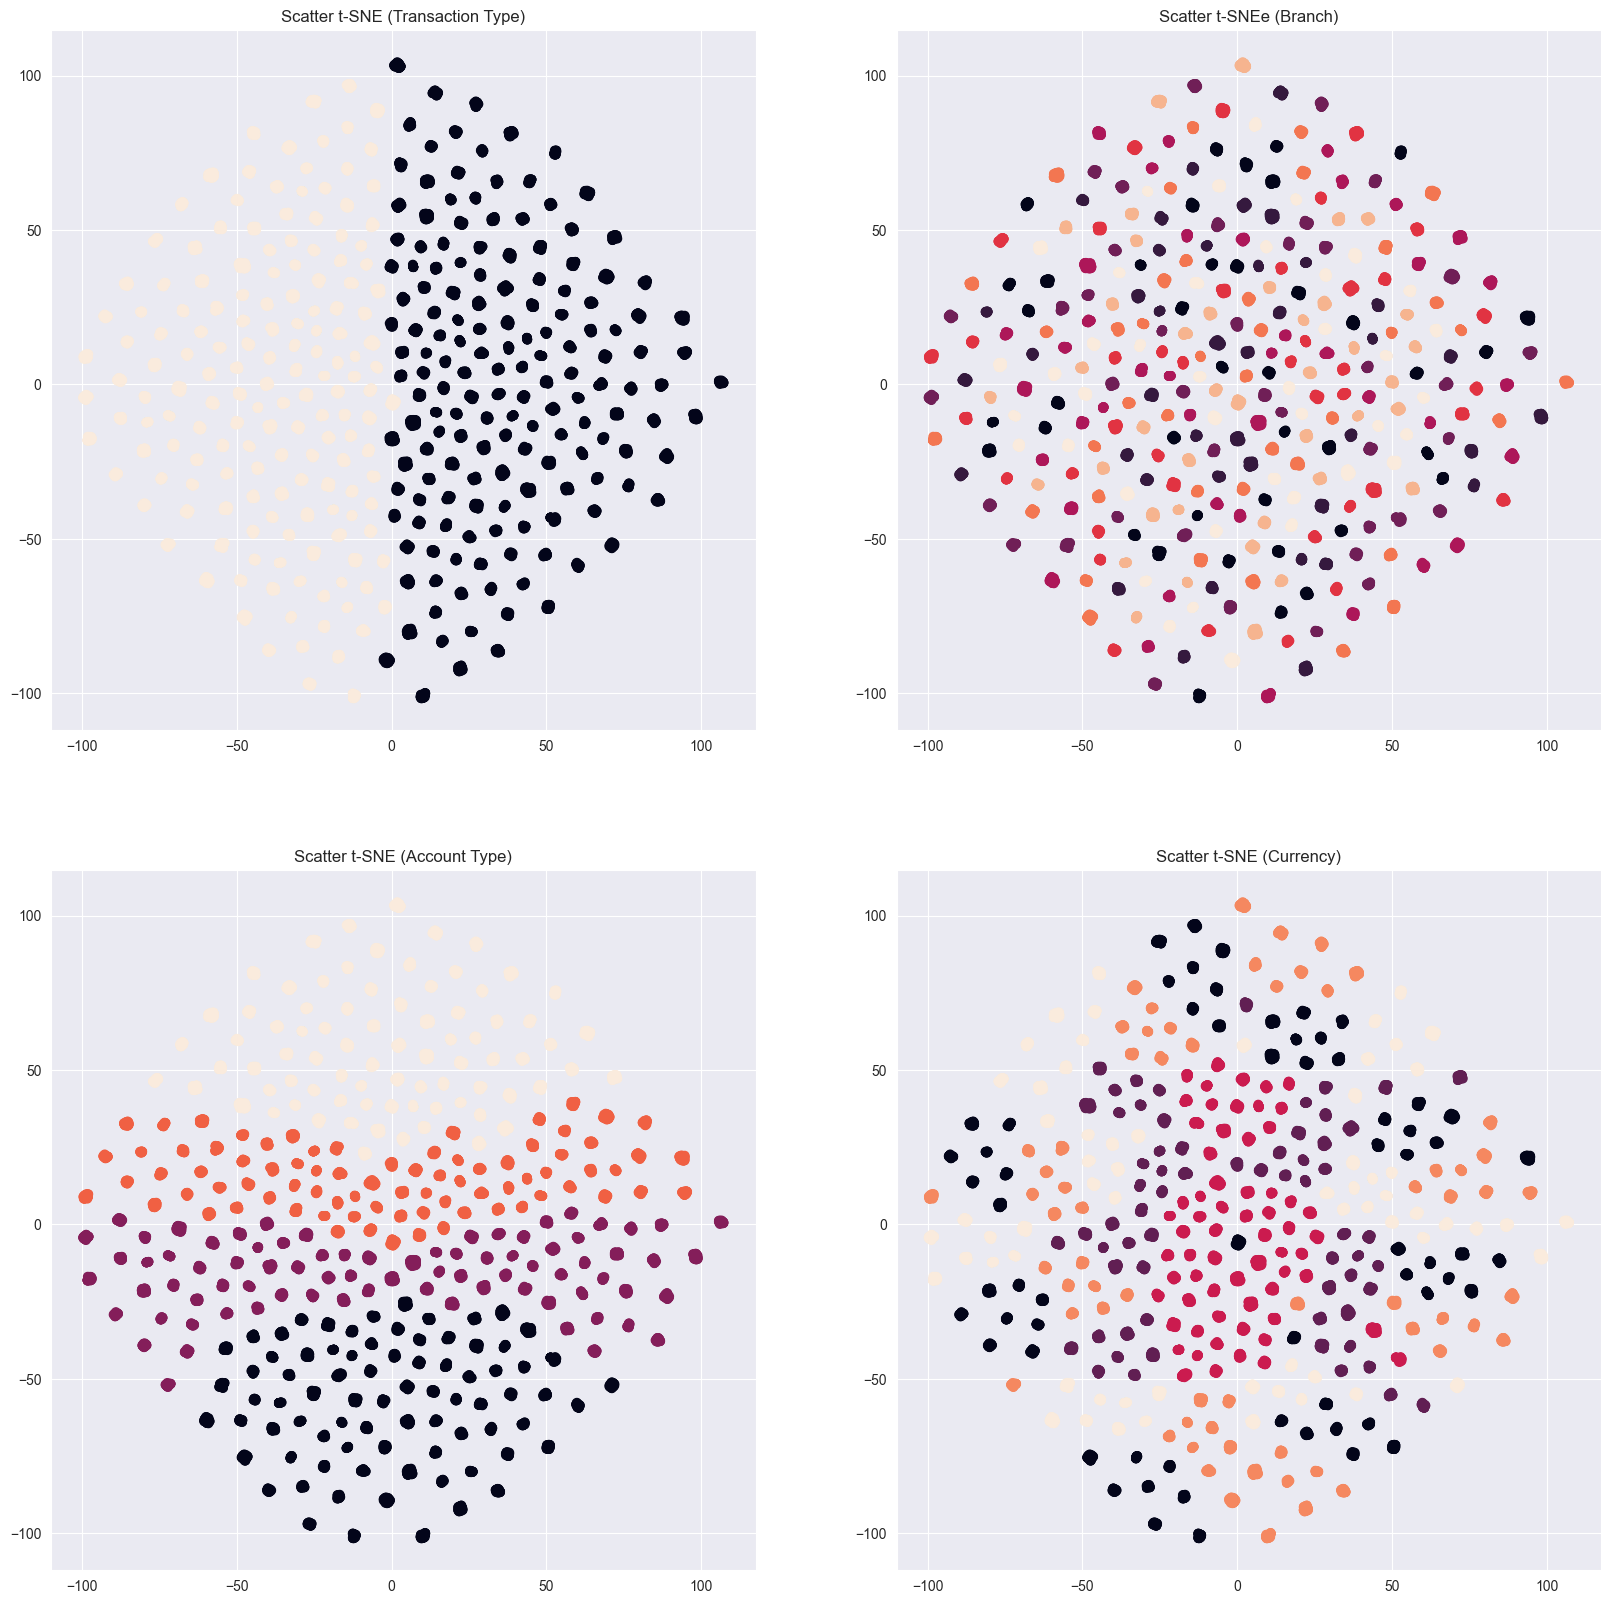

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0,0].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Transaction Type'])
axes[0,0].set_title('Scatter t-SNE (Transaction Type)')

axes[1,0].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Account Type'])
axes[1,0].set_title('Scatter t-SNE (Account Type)')

axes[0,1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Branch'])
axes[0,1].set_title('Scatter t-SNEe (Branch)')

axes[1,1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Currency'])
axes[1,1].set_title('Scatter t-SNE (Currency)')

Można tak zrobić ale klastry które powstaną będą po prostu kombinacjami zmiennych kategorycznych. Czy da się lepiej? Przykładowe klastrowanie poniżej.

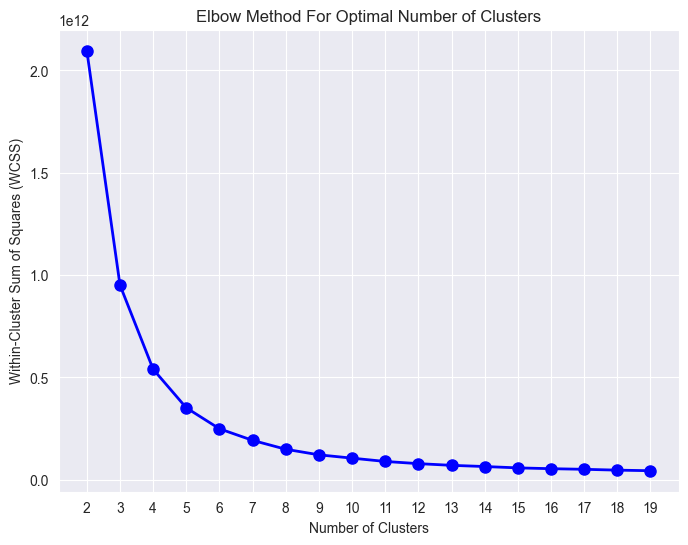

In [47]:
from sklearn.cluster import KMeans

range_n_clusters = range(2, 20)

wcss = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, wcss, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

4/5?

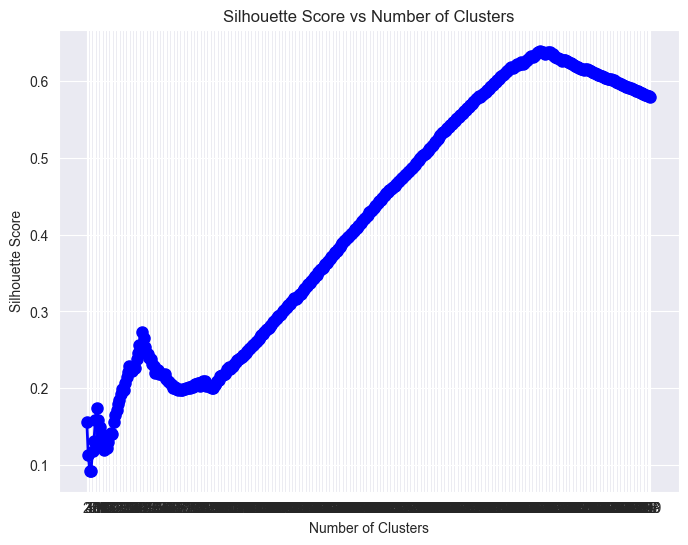

In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = range(2, 400)

silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_minmax)
    silhouette_avg = silhouette_score(X_minmax, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

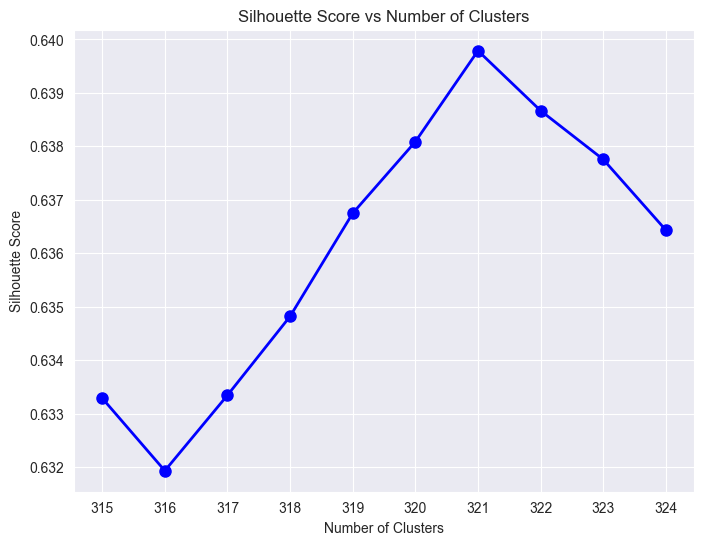

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = range(315, 325)

silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_minmax)
    silhouette_avg = silhouette_score(X_minmax, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

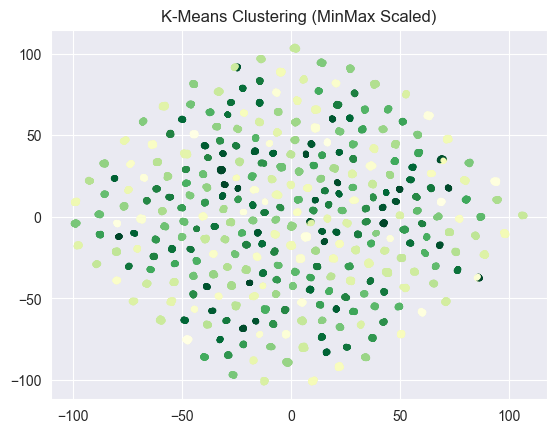

In [55]:
kmeans2 = KMeans(n_clusters=321, random_state=42).fit_predict(X_minmax)

plt.scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10, c=kmeans2, cmap=plt.get_cmap('YlGn'))
plt.title('K-Means Clustering (MinMax Scaled)')
plt.show()

## Podejście z label encoder

In [75]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df1 = df_original.copy()

X = df1.values

# t-SNE dla nieprzekształconych danych
tsne_raw = TSNE(n_components=2, random_state=42)
X_tsne_raw = tsne_raw.fit_transform(X)

# 2. t-SNE dla danych po normalizacji
X_minmax = MinMaxScaler().fit_transform(X)
X_tsne_minmax = TSNE(n_components=2, random_state=42).fit_transform(X_minmax)

# 3. t-SNE dla danych po standaryzacji
X_standard = StandardScaler().fit_transform(X)
X_tsne_standard = TSNE(n_components=2, random_state=42).fit_transform(X_standard)

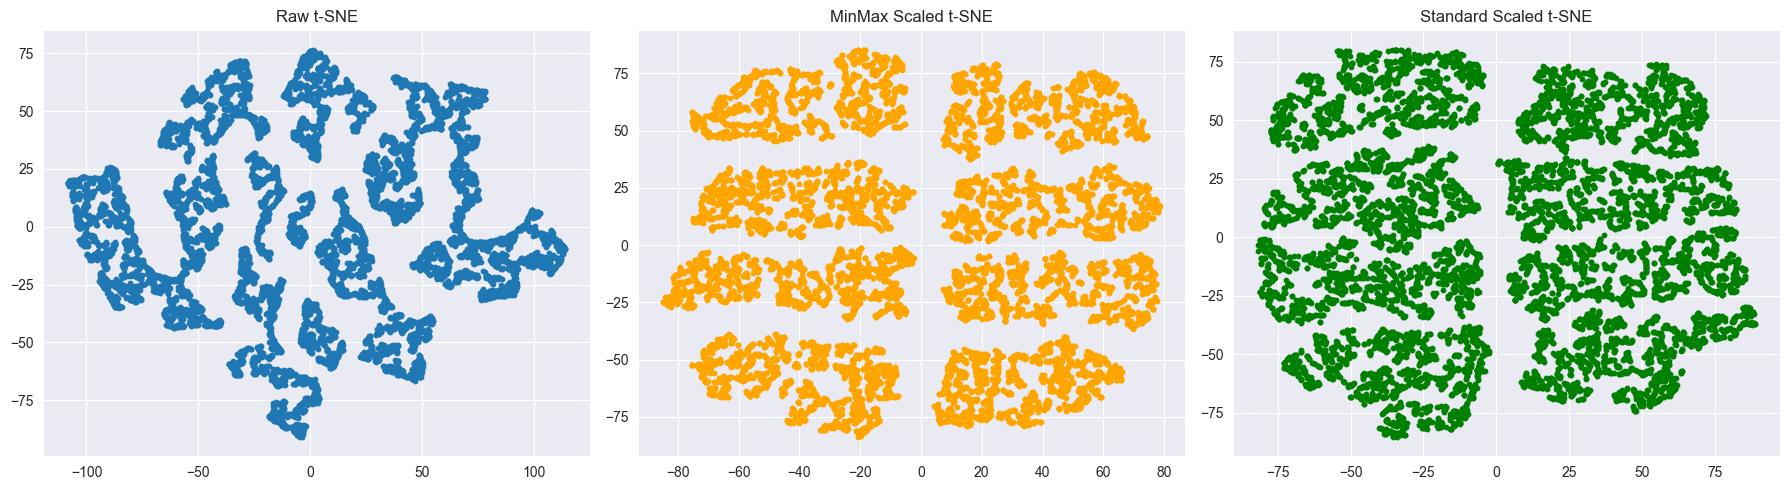

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_tsne_raw[:, 0], X_tsne_raw[:, 1], s=10)
axes[0].set_title('Raw t-SNE')

axes[1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10, c='orange')
axes[1].set_title('MinMax Scaled t-SNE')

axes[2].scatter(X_tsne_standard[:, 0], X_tsne_standard[:, 1], s=10, c='green')
axes[2].set_title('Standard Scaled t-SNE')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Scatter t-SNE (Currency)')

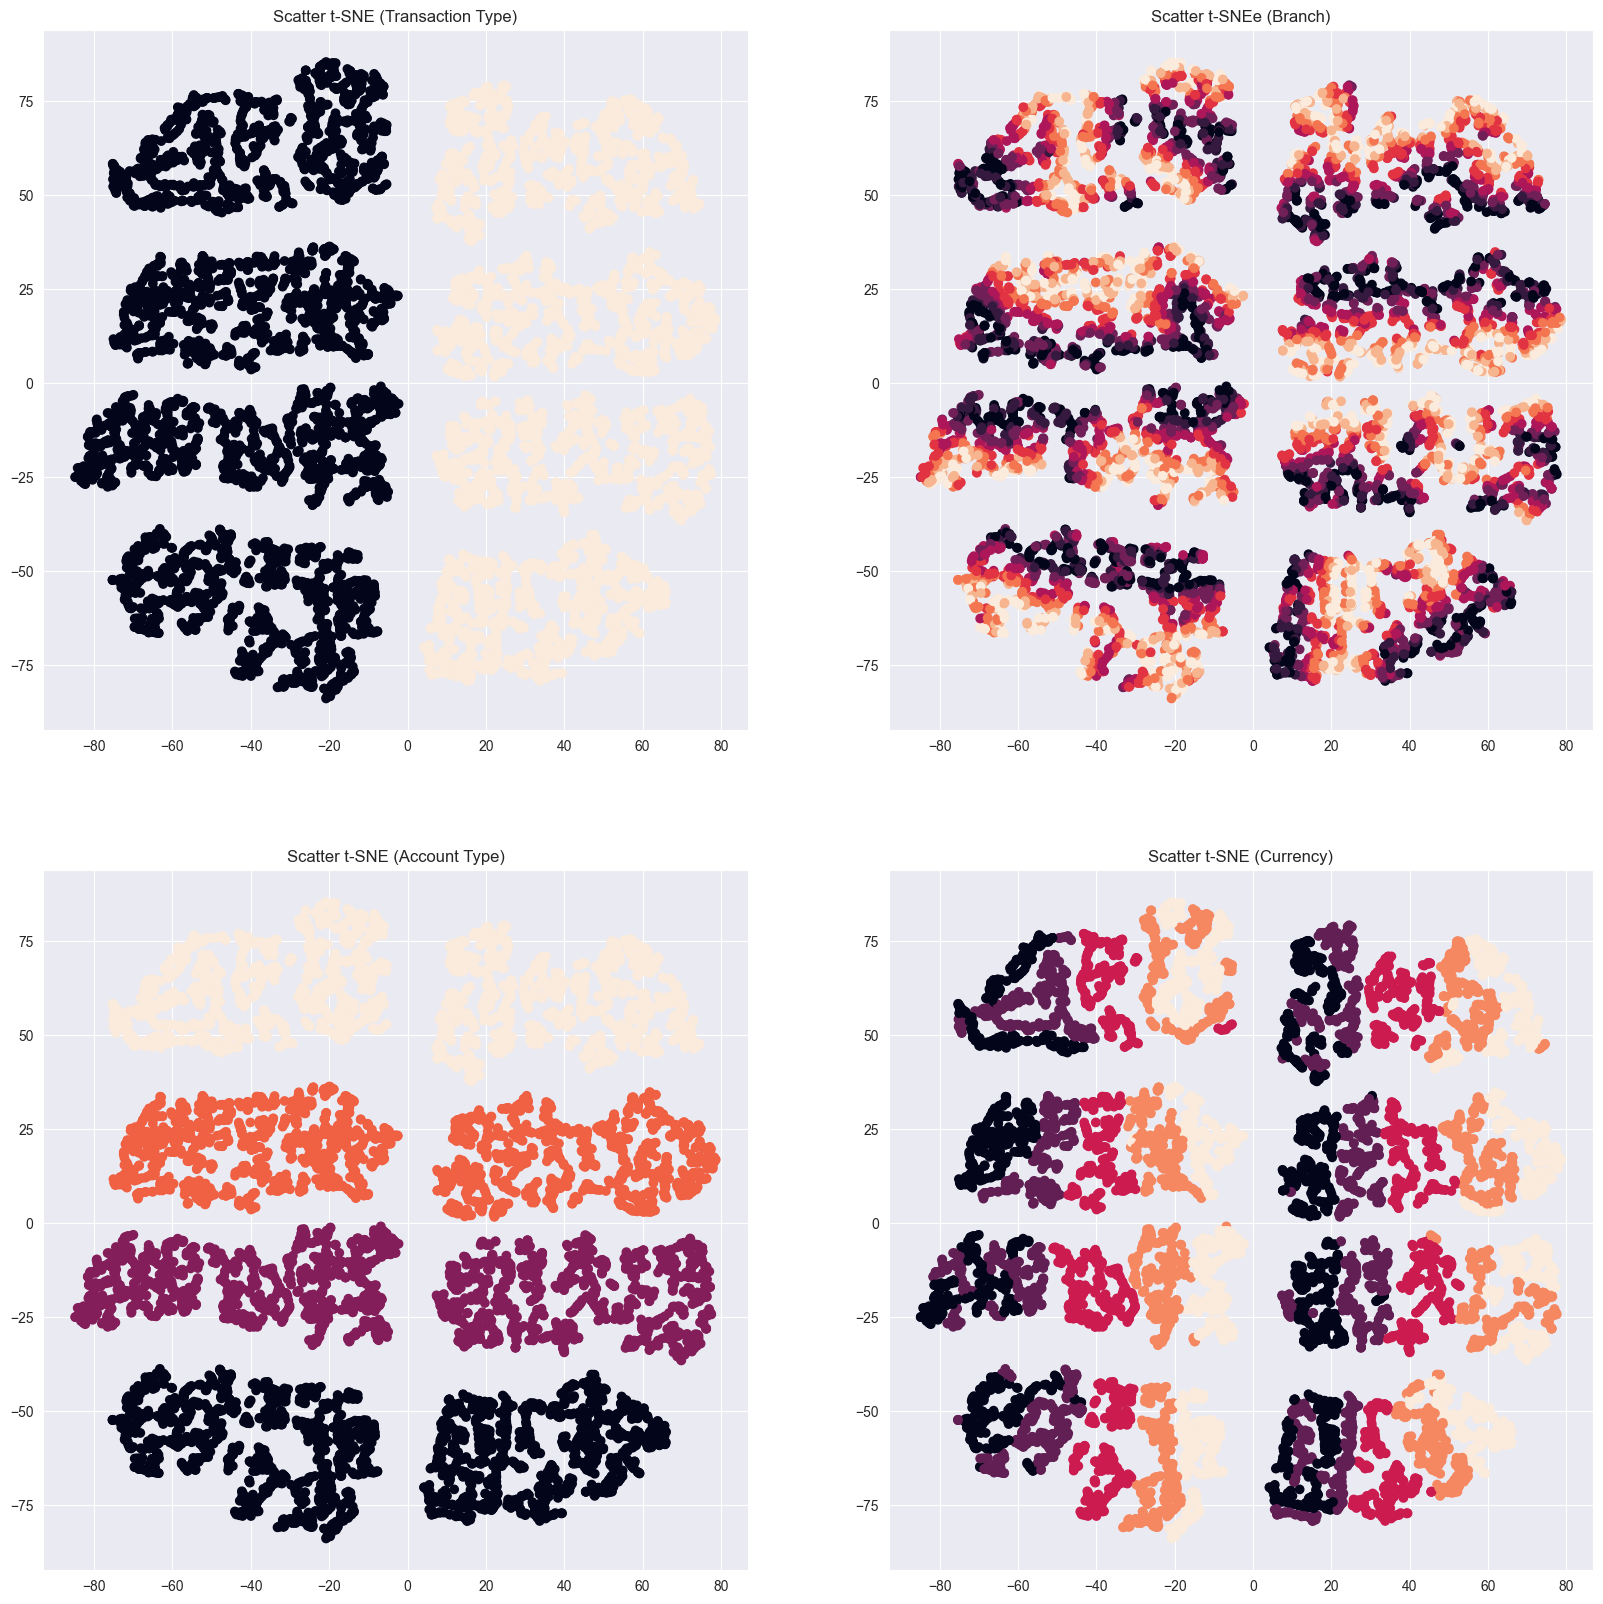

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0,0].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Transaction Type'])
axes[0,0].set_title('Scatter t-SNE (Transaction Type)')

axes[1,0].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Account Type'])
axes[1,0].set_title('Scatter t-SNE (Account Type)')

axes[0,1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Branch'])
axes[0,1].set_title('Scatter t-SNEe (Branch)')

axes[1,1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], c=df_original['Currency'])
axes[1,1].set_title('Scatter t-SNE (Currency)')

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42).fit_predict(X_minmax)

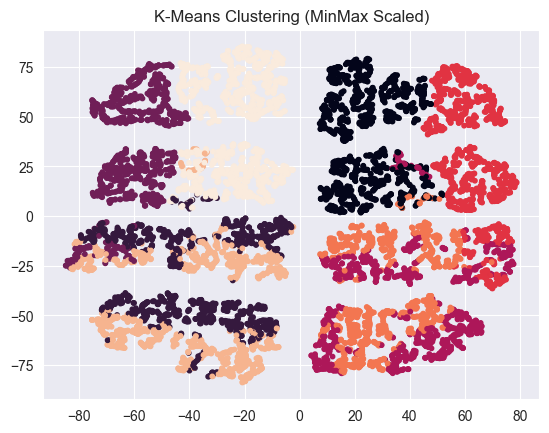

In [79]:
plt.scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10, c=kmeans)
plt.title('K-Means Clustering (MinMax Scaled)')
plt.show()

In [114]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5).fit_predict(X_minmax)

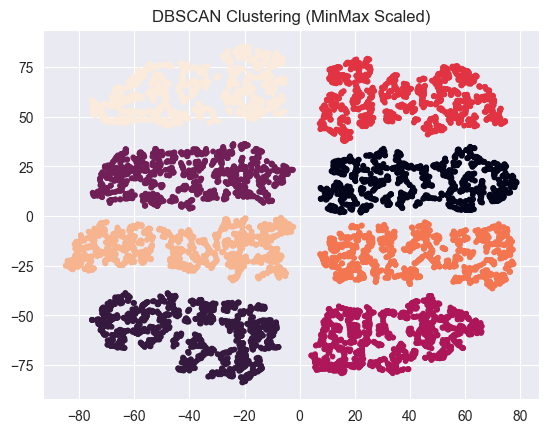

In [115]:
plt.scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10, c=dbscan)
plt.title('DBSCAN Clustering (MinMax Scaled)')
plt.show()

## Proba PCA (raczej bez sensu bo mamy zmienne kategoryczne)

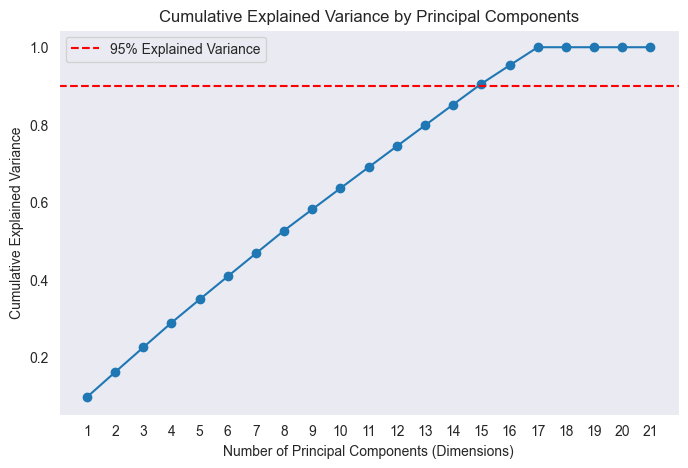

In [200]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.copy()

X = StandardScaler().fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components (Dimensions)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid()
plt.axhline(y=0.9, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [201]:
pca = PCA(n_components=15)

x_reduced = pca.fit_transform(StandardScaler().fit_transform(df.copy()))

In [202]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = x_reduced.copy()

# t-SNE dla nieprzekształconych danych
tsne_raw = TSNE(n_components=2, random_state=42)
X_tsne_raw = tsne_raw.fit_transform(X)

# 2. t-SNE dla danych po normalizacji
X_minmax = MinMaxScaler().fit_transform(X)
X_tsne_minmax = TSNE(n_components=2, random_state=42).fit_transform(X_minmax)

# 3. t-SNE dla danych po standaryzacji
X_standard = StandardScaler().fit_transform(X)
X_tsne_standard = TSNE(n_components=2, random_state=42).fit_transform(X_standard)

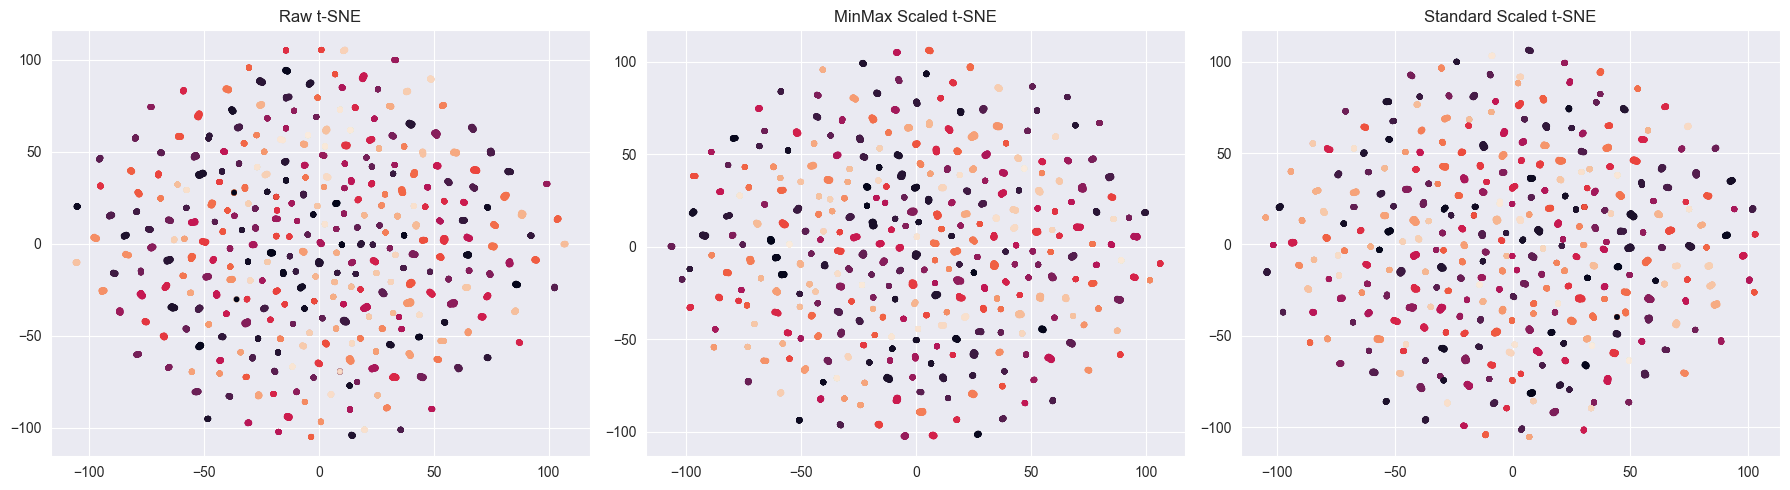

In [203]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_tsne_raw[:, 0], X_tsne_raw[:, 1], s=10,
                c=DBSCAN(eps=0.3, min_samples=5).fit_predict(X))
axes[0].set_title('Raw t-SNE')

axes[1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10,
                c=DBSCAN(eps=0.3, min_samples=5).fit_predict(X_minmax))
axes[1].set_title('MinMax Scaled t-SNE')

axes[2].scatter(X_tsne_standard[:, 0], X_tsne_standard[:, 1], s=10,
                c=DBSCAN(eps=0.3, min_samples=5).fit_predict(X_standard))
axes[2].set_title('Standard Scaled t-SNE')

plt.tight_layout()
plt.show()

## znowu PCA ale na label encoderze

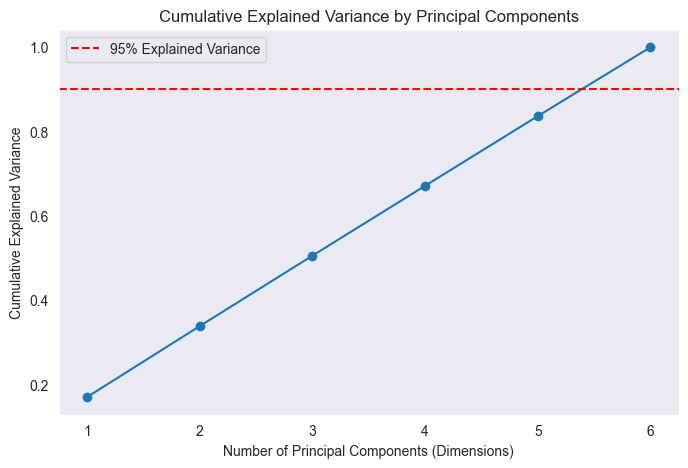

In [204]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df_original.copy()

X = StandardScaler().fit_transform(X)

pca = PCA()
principal_components = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components (Dimensions)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid()
plt.axhline(y=0.9, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [205]:
pca = PCA(n_components=6)

x_reduced = pca.fit_transform(df_original.copy())

In [206]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = x_reduced.copy()

# t-SNE dla nieprzekształconych danych
tsne_raw = TSNE(n_components=2, random_state=42)
X_tsne_raw = tsne_raw.fit_transform(X)

# 2. t-SNE dla danych po normalizacji
X_minmax = MinMaxScaler().fit_transform(X)
X_tsne_minmax = TSNE(n_components=2, random_state=42).fit_transform(X_minmax)

# 3. t-SNE dla danych po standaryzacji
X_standard = StandardScaler().fit_transform(X)
X_tsne_standard = TSNE(n_components=2, random_state=42).fit_transform(X_standard)

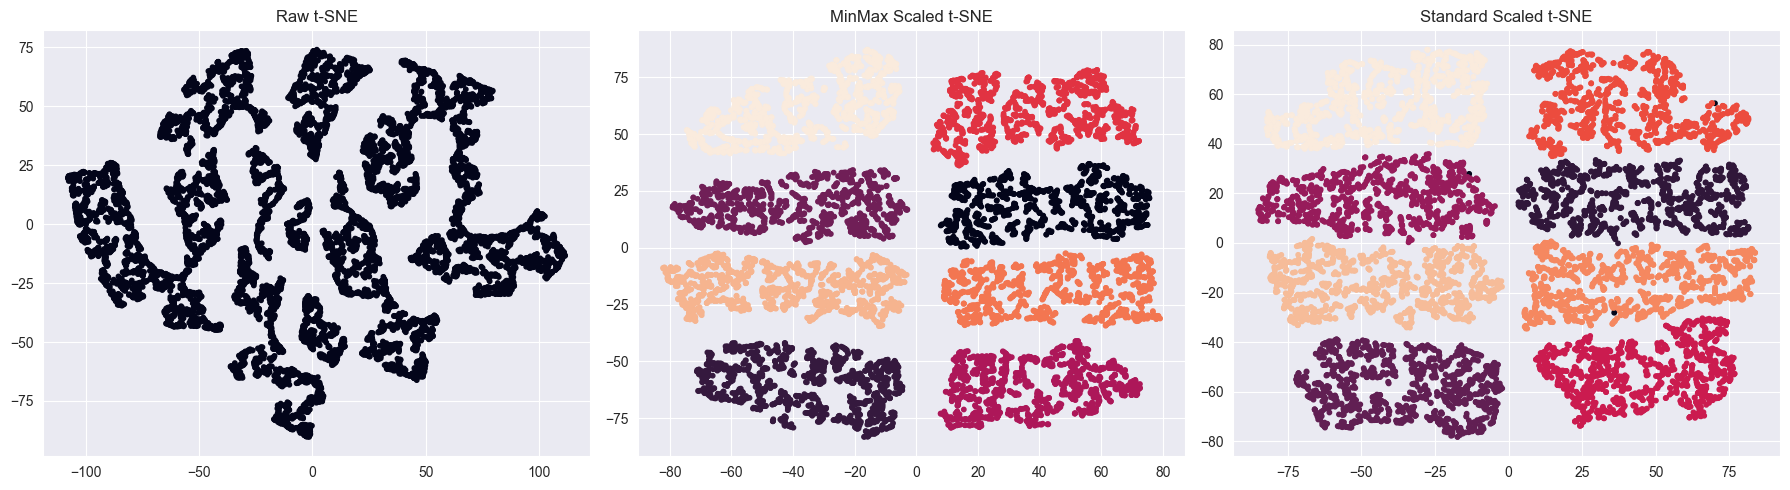

In [207]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_tsne_raw[:, 0], X_tsne_raw[:, 1], s=10,
                c=DBSCAN(eps=1, min_samples=5).fit_predict(X))
axes[0].set_title('Raw t-SNE')

axes[1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10,
                c=DBSCAN(eps=0.3, min_samples=5).fit_predict(X_minmax))
axes[1].set_title('MinMax Scaled t-SNE')

axes[2].scatter(X_tsne_standard[:, 0], X_tsne_standard[:, 1], s=10,
                c=DBSCAN(eps=0.8, min_samples=2).fit_predict(X_standard))
axes[2].set_title('Standard Scaled t-SNE')

plt.tight_layout()
plt.show()

Szczerze mówiąc wygląda to całkiem spoko. Potrzebuję od Ciebie feedback

Dla mnie wychodzi z tego, że najważniejsze w podziale naszych klientów jest 'Transaction Type' oraz 'Account Type', czyli pozostałe dwie (Branch oraz Currency) nie są użyteczne (?)

In [208]:
pca = PCA(n_components=6)

x_reduced = pca.fit_transform(df.copy())

In [209]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = x_reduced.copy()

# t-SNE dla nieprzekształconych danych
tsne_raw = TSNE(n_components=2, random_state=42)
X_tsne_raw = tsne_raw.fit_transform(X)

# 2. t-SNE dla danych po normalizacji
X_minmax = MinMaxScaler().fit_transform(X)
X_tsne_minmax = TSNE(n_components=2, random_state=42).fit_transform(X_minmax)

# 3. t-SNE dla danych po standaryzacji
X_standard = StandardScaler().fit_transform(X)
X_tsne_standard = TSNE(n_components=2, random_state=42).fit_transform(X_standard)

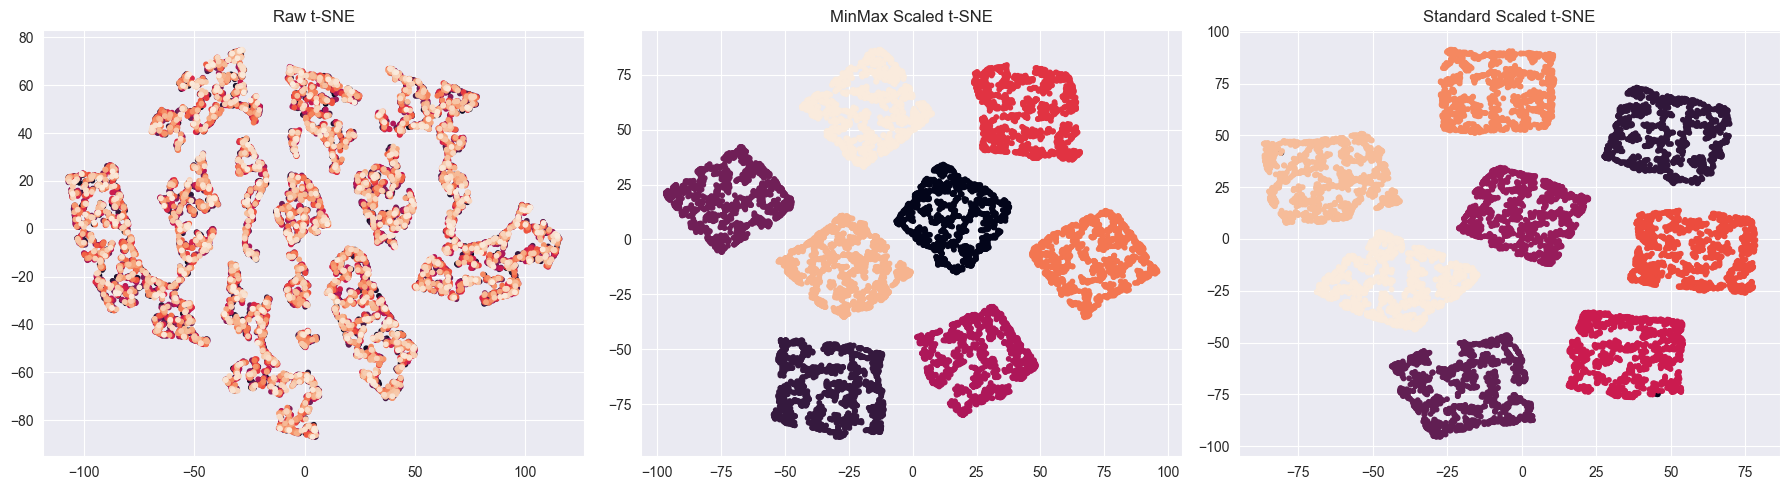

In [222]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_tsne_raw[:, 0], X_tsne_raw[:, 1], s=10,
                c=DBSCAN(eps=0.1, min_samples=1).fit_predict(X))
axes[0].set_title('Raw t-SNE')

axes[1].scatter(X_tsne_minmax[:, 0], X_tsne_minmax[:, 1], s=10,
                c=DBSCAN(eps=0.3, min_samples=5).fit_predict(X_minmax))
axes[1].set_title('MinMax Scaled t-SNE')

axes[2].scatter(X_tsne_standard[:, 0], X_tsne_standard[:, 1], s=10,
                c=DBSCAN(eps=0.3, min_samples=5).fit_predict(X_standard))
axes[2].set_title('Standard Scaled t-SNE')

plt.tight_layout()
plt.show()